1. Data Collection

● The dataset typically consists of handwritten images, such as digits (e.g., the

MNIST dataset) or characters.

● Each image is labeled with the corresponding class (e.g., the digit or letter it

represents).

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int) 

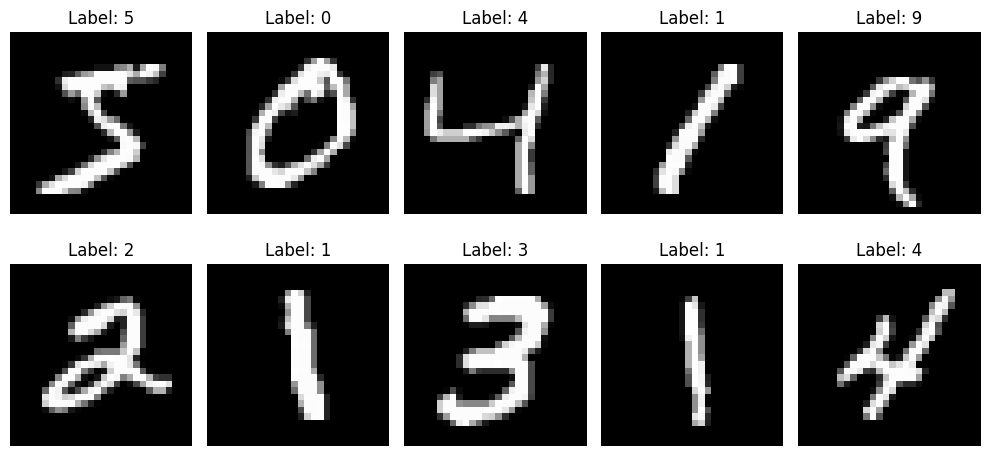

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"Label: {y[i]}")
plt.tight_layout()
plt.show()

2. Data Preprocessing

● Flattening the Images: Convert 2D image data into a 1D vector to feed into the

decision tree.

● Feature Extraction: Optionally, extract specific features (e.g., pixel intensities,

edges) to simplify the input data.

● Scaling or Normalization: Normalize the pixel values (e.g., from 0-255 to 0-1) if

required.

In [22]:
X = X / 255.0

3. Splitting the Dataset

● Divide the data into training and testing sets, commonly using an 80-20 or 70-30

split.

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4. Decision Tree Model

● A decision tree classifier is built using libraries like scikit-learn in Python.

● Each node in the tree splits the data based on feature thresholds to maximize

classification accuracy (e.g., using Gini impurity or entropy).

In [25]:

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="gini", random_state=42)
model.fit(X_train, y_train)
y_pred_dt = model.predict(X_test)

In [26]:

from sklearn.svm import SVC
svm = SVC(kernel="linear", random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

5. Compare it with SVM using F1 score and accuracy score

In [27]:
from sklearn.metrics import f1_score, accuracy_score
dt_f1 = f1_score(y_test, y_pred_dt, average="weighted")
dt_accuracy = accuracy_score(y_test, y_pred_dt)

svm_f1 = f1_score(y_test, y_pred_svm, average="weighted")
svm_accuracy = accuracy_score(y_test, y_pred_svm)

In [28]:
print("Decision Tree Performance:")
print(f"F1 Score: {dt_f1:.4f}, Accuracy: {dt_accuracy:.4f}\n")

print("SVM Performance:")
print(f"F1 Score: {svm_f1:.4f}, Accuracy: {svm_accuracy:.4f}")

Decision Tree Performance:
F1 Score: 0.8695, Accuracy: 0.8696

SVM Performance:
F1 Score: 0.9350, Accuracy: 0.9351


In [29]:
models = ["Decision Tree", "SVM"]
f1_scores = [dt_f1, svm_f1]
accuracies = [dt_accuracy, svm_accuracy]

6. The comparison must be represented using graphs

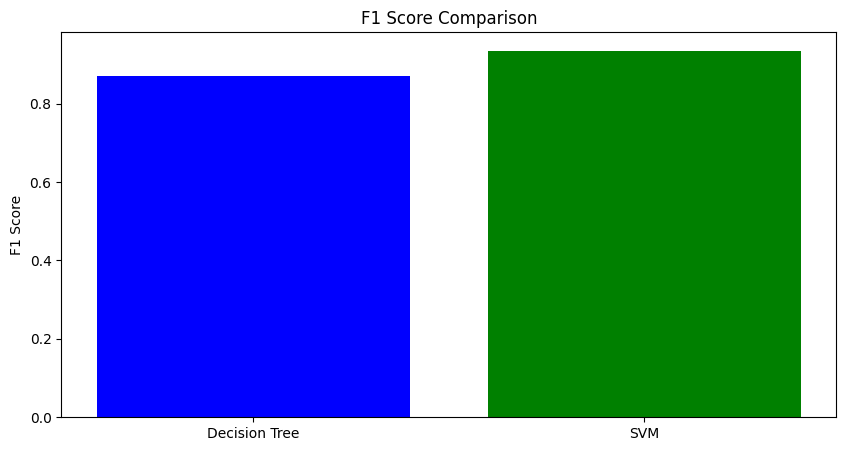

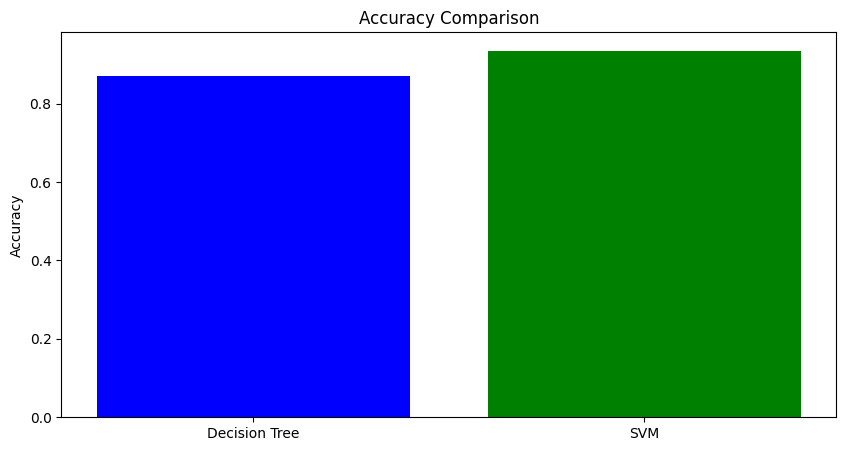

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(models, f1_scores, color=["blue", "green"])
plt.title("F1 Score Comparison")
plt.ylabel("F1 Score")
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color=["blue", "green"])
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()
